
**NOT REQUIRED**<br>**In this notebook, values below threshold value set to 1 (i.e. number of connections - more; strength of connectivity - less)**

In [ ]:
import pandas as pd
import pickle

# Save dataframe to pickled pandas object
# df.to_pickle(file_name) # where to save it usually as a .pkl

# Load dataframe from pickled pandas object
df = pd.read_pickle('/content/roitimeseriesdata.pkl')

# Rename the third column to "ROIxTimeseries"
df = df.rename(columns={df.columns[2]: "ROIxTimeseries"})

print(df)

   site patient_id                                     ROIxTimeseries label
0   NYU      50965  [[0.706183, 1.258003, 0.042666, -2.820356, -5....     1
1   NYU      50990  [[-3.279094, -6.948174, -8.92033, -8.804001, -...     1
2   NYU      50957  [[9.66222, 8.258377, 2.37984, -3.478141, -6.05...     1
3   NYU      50967  [[4.721457, 7.912924, 8.742649, 6.427285, 2.21...     1
4   NYU      50974  [[5.851009, 7.150782, 4.961509, 0.283124, -4.0...     1
5   NYU      51013  [[-1.481923, -0.191252, -1.457838, -5.373023, ...     1
6   NYU      51015  [[-1.754589, -2.926472, -4.571375, -4.713179, ...     1
7   NYU      50996  [[4.428881, 1.885072, -3.001936, -6.947103, -7...     1
8   NYU      50977  [[5.811244, 9.114678, 6.911661, 0.606224, -4.1...     1
9   NYU      50992  [[1.321344, -1.506006, -4.413543, -4.332966, -...     1
10  NYU      51007  [[5.25749, 12.46537, 14.226592, 7.527265, -4.3...     1
11  NYU      51012  [[9.326157, 7.579217, 1.68043, -2.946055, -2.4...     1
12  NYU     

In [ ]:
# Assuming your DataFrame is named df
third_column = df['ROIxTimeseries']  # Selecting all rows and the third column (index 2)

print(third_column)

0     [[0.706183, 1.258003, 0.042666, -2.820356, -5....
1     [[-3.279094, -6.948174, -8.92033, -8.804001, -...
2     [[9.66222, 8.258377, 2.37984, -3.478141, -6.05...
3     [[4.721457, 7.912924, 8.742649, 6.427285, 2.21...
4     [[5.851009, 7.150782, 4.961509, 0.283124, -4.0...
5     [[-1.481923, -0.191252, -1.457838, -5.373023, ...
6     [[-1.754589, -2.926472, -4.571375, -4.713179, ...
7     [[4.428881, 1.885072, -3.001936, -6.947103, -7...
8     [[5.811244, 9.114678, 6.911661, 0.606224, -4.1...
9     [[1.321344, -1.506006, -4.413543, -4.332966, -...
10    [[5.25749, 12.46537, 14.226592, 7.527265, -4.3...
11    [[9.326157, 7.579217, 1.68043, -2.946055, -2.4...
12    [[1.884253, 4.035859, 3.173807, -0.894492, -5....
13    [[-13.943059, -17.944493, -5.253335, 13.283772...
14    [[4.396806, 1.299931, -3.178451, -5.013186, -2...
15    [[1.48535, 2.884969, 1.535843, -1.060772, -1.2...
16    [[-0.872018, -6.980013, -10.826739, -10.537724...
17    [[5.151979, 3.185684, -2.209435, -5.959943

In [ ]:
import numpy as np

Generating Matrices now

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from scipy.signal import hilbert

In [ ]:
def psi(x, y):
  """Calculate the phase synchronization index between two signals.

  Args:
    x: A NumPy array representing the first signal.
    y: A NumPy array representing the second signal.

  Returns:
    A NumPy array representing the PSI between the two signals.
  """

  # Calculate the analytic representation of the signals.
  x_analytic = hilbert(x)
  y_analytic = hilbert(y)

  # Calculate the instantaneous phase of the signals.
  x_phase = np.angle(x_analytic)
  y_phase = np.angle(y_analytic)

  # print("Phases:\n X:",x_phase.shape, "Y:",y_phase.shape)
  # print("DIFF in phase : ", x_phase - y_phase)
  # print("Cosine : ", np.cos(x_phase-y_phase))
  # Calculate the PSI.
  psi = abs(np.mean(np.cos(x_phase - y_phase)))

  return psi

For all patients

In [ ]:
# Function to convert matrix rows [all rows] into separate arrays
def expand_matrix_row(row):
    arrays = row['ROIxTimeseries']
    patient_id = row['patient_id']
    new_rows = [{'patient_id': patient_id, 'Array': np.array(arr)} for arr in arrays]
    return pd.DataFrame(new_rows)

num_rows = len(df)

# Initialize an empty list to store the results
result_list = []

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    # Expand the matrix rows into separate arrays for the current row
    expanded_df = expand_matrix_row(row)

    # Initialize an empty matrix to store PSI values for the current row
    num_rows_expanded = len(expanded_df)
    psi_matrix_1pat = np.zeros((num_rows_expanded, num_rows_expanded))

    # Loop through every pair of rows
    for i in range(num_rows_expanded):
        for j in range(i, num_rows_expanded):
            # Ensure not to repeat pairs
            if i == j:
                # Calculate the diagonal element
                x = expanded_df.iloc[i]['Array']
                psi_value = psi(x, x)
                psi_matrix_1pat[i, j] = psi_value
            else:
                # Extract signals for the current pair of rows
                x = expanded_df.iloc[i]['Array']
                y = expanded_df.iloc[j]['Array']
                # Calculate the PSI value for the current pair of signals
                psi_value = psi(x, y)
                # Store the PSI value in the matrix
                psi_matrix_1pat[i, j] = psi_value
                psi_matrix_1pat[j, i] = psi_value  # Since PSI is symmetric, store in both positions

            psi_matrix_1pat.shape

    # Append the PSI matrix and label to the result list
    result_list.append({'psi_matrix': psi_matrix_1pat, 'label': row['label']})

# Create a DataFrame from the result list
result_df = pd.DataFrame(result_list)

In [ ]:
print(result_df.shape)

(42, 2)


In [ ]:
# Get the matrix from the first row (row index 0)
matrix_row_1 = result_df.loc[0, 'psi_matrix']

# Get the shape (dimensions) of the matrix
matrix_shape_row_1 = matrix_row_1.shape

print(f"The shape of the matrix in row 1 is: {matrix_shape_row_1}")

The shape of the matrix in row 1 is: (116, 116)


In [ ]:
# Get the matrix from the first row (row index 0)
matrix_row_1 = result_df.loc[0, 'psi_matrix']

# Print the matrix
print(matrix_row_1)

[[1.         0.25906469 0.06693214 ... 0.13713135 0.01496673 0.05904445]
 [0.25906469 1.         0.21868974 ... 0.01127428 0.10975937 0.05835404]
 [0.06693214 0.21868974 1.         ... 0.18562702 0.03774552 0.18821166]
 ...
 [0.13713135 0.01127428 0.18562702 ... 1.         0.30204957 0.23777238]
 [0.01496673 0.10975937 0.03774552 ... 0.30204957 1.         0.21706852]
 [0.05904445 0.05835404 0.18821166 ... 0.23777238 0.21706852 1.        ]]


Dataset preparation

In [ ]:
# Drop the first 30 rows from the original DataFrame
result_df = result_df.drop(df.index[:12])

print(result_df.shape)

(30, 2)


In [ ]:
X = np.array(result_df['psi_matrix'])

In [ ]:
X

array([array([[1.        , 0.21045165, 0.13057345, ..., 0.05106844, 0.11107471,
               0.08856149],
              [0.21045165, 1.        , 0.04036313, ..., 0.07104244, 0.11646346,
               0.06221619],
              [0.13057345, 0.04036313, 1.        , ..., 0.28465989, 0.16656628,
               0.14328863],
              ...,
              [0.05106844, 0.07104244, 0.28465989, ..., 1.        , 0.04139648,
               0.1365227 ],
              [0.11107471, 0.11646346, 0.16656628, ..., 0.04139648, 1.        ,
               0.21091457],
              [0.08856149, 0.06221619, 0.14328863, ..., 0.1365227 , 0.21091457,
               1.        ]])                                                   ,
       array([[1.        , 0.41104646, 0.00309121, ..., 0.1384899 , 0.23812549,
               0.31745494],
              [0.41104646, 1.        , 0.25684993, ..., 0.00500167, 0.02535889,
               0.07197007],
              [0.00309121, 0.25684993, 1.        , ..., 0.110376

In [ ]:
y = result_df['label']

In [ ]:
y

12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
Name: label, dtype: int64

Setting threshold

In [ ]:
sub1_mat = result_df.iloc[0]

# Extract the matrix from the attribute of the first row
first_matrix = sub1_mat['psi_matrix']

In [ ]:
first_matrix

array([[1.        , 0.21045165, 0.13057345, ..., 0.05106844, 0.11107471,
        0.08856149],
       [0.21045165, 1.        , 0.04036313, ..., 0.07104244, 0.11646346,
        0.06221619],
       [0.13057345, 0.04036313, 1.        , ..., 0.28465989, 0.16656628,
        0.14328863],
       ...,
       [0.05106844, 0.07104244, 0.28465989, ..., 1.        , 0.04139648,
        0.1365227 ],
       [0.11107471, 0.11646346, 0.16656628, ..., 0.04139648, 1.        ,
        0.21091457],
       [0.08856149, 0.06221619, 0.14328863, ..., 0.1365227 , 0.21091457,
        1.        ]])

In [ ]:
first_matrix.shape

(116, 116)

In [ ]:
import numpy as np

# Assuming your matrix is named 'matrix'
# Flatten the matrix into a 1D array
flat_matrix = first_matrix.flatten()

# Create a histogram of the values in the array
hist, bins = np.histogram(flat_matrix, bins=10)  # Adjust the number of bins as needed

# Find the bin with the highest count
max_count_index = np.argmax(hist)

# Determine the corresponding value (bin edge) as the threshold
threshold_value = bins[max_count_index + 1]

print("Threshold value:", threshold_value)

Threshold value: 0.10004098942514499


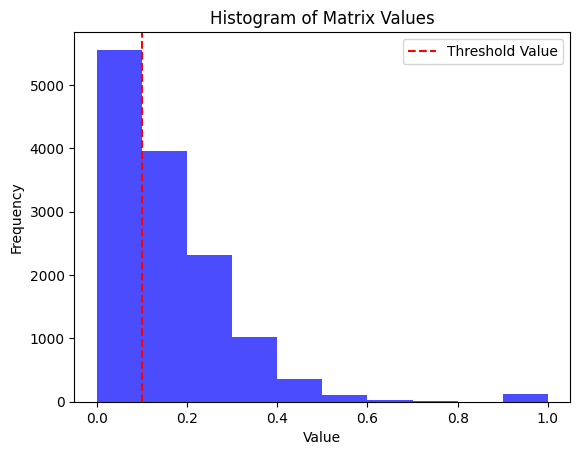

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram with bins
plt.hist(flat_matrix, bins=10, color='blue', alpha=0.7)
plt.axvline(x=threshold_value, color='red', linestyle='--', label='Threshold Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Matrix Values')
plt.legend()
plt.show()

In [ ]:
total_data_points = np.sum(hist)
print("Total number of data points from histogram:", total_data_points)

Total number of data points from histogram: 13456


In [ ]:
import numpy as np

# Assuming your matrix is named 'matrix'
# Flatten the matrix into a 1D array
flat_matrix = first_matrix.flatten()

# Create a histogram of the values in the array
hist, bins = np.histogram(flat_matrix, bins=5)  # Adjust the number of bins as needed

# Find the bin with the highest count
max_count_index = np.argmax(hist)

# Determine the corresponding value (bin edge) as the threshold
threshold_value = bins[max_count_index + 1]

print("Threshold value:", threshold_value)

Threshold value: 0.2000364350445733


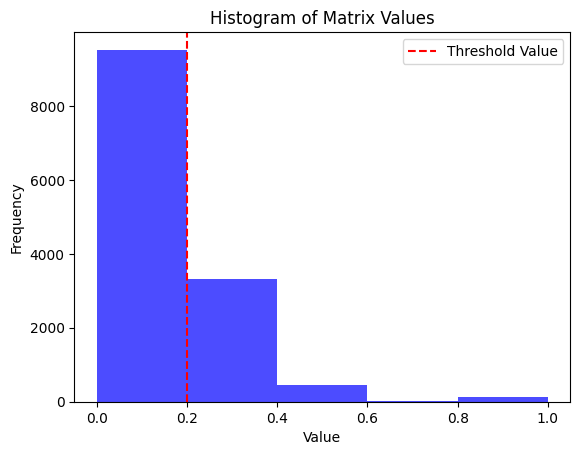

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram with bins
plt.hist(flat_matrix, bins=5, color='blue', alpha=0.7)
plt.axvline(x=threshold_value, color='red', linestyle='--', label='Threshold Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Matrix Values')
plt.legend()
plt.show()

In [ ]:
total_data_points = np.sum(hist)
print("Total number of data points from histogram:", total_data_points)

Total number of data points from histogram: 13456


Threshold value for row 12 : 0.10004098942514499


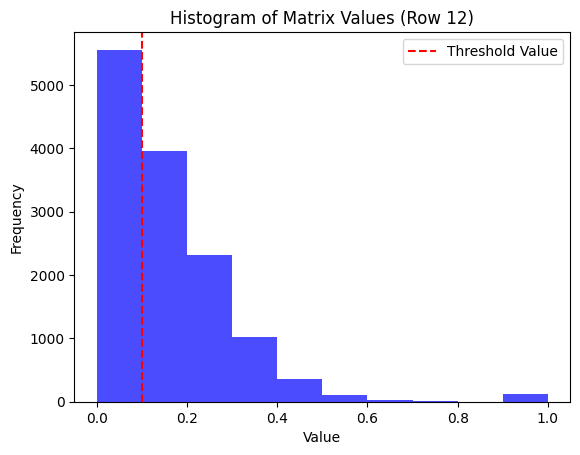

Threshold value for row 13 : 0.10006729865522275


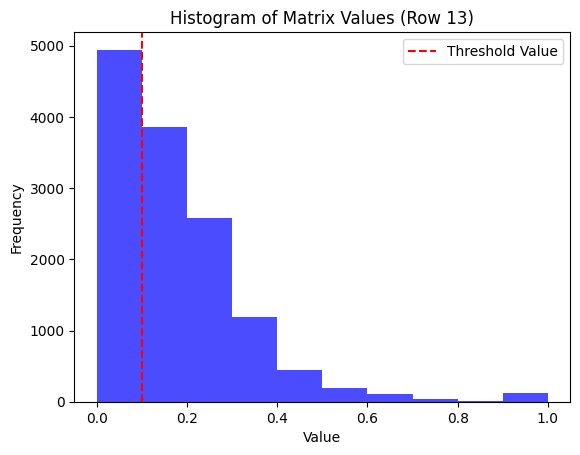

Threshold value for row 14 : 0.10010492416374074


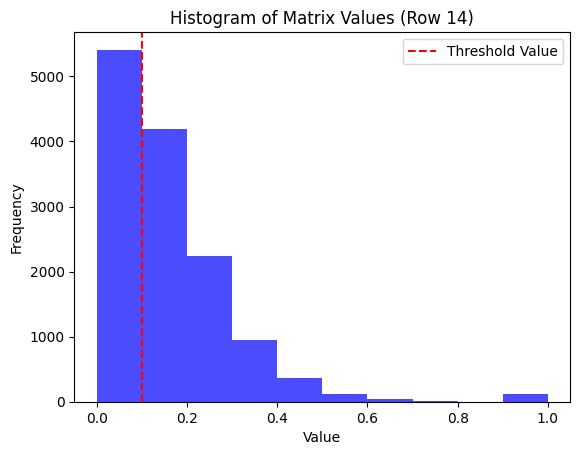

Threshold value for row 15 : 0.10001340657750231


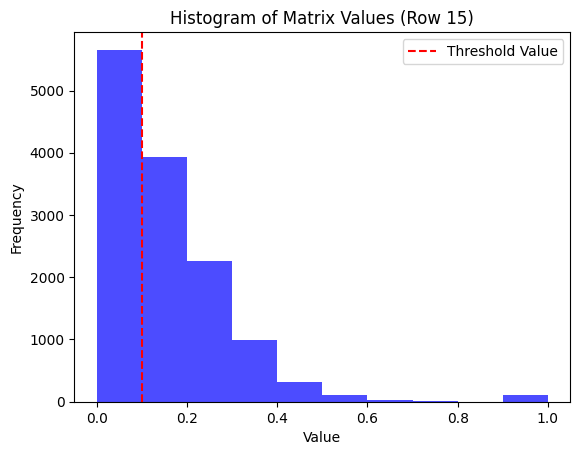

Threshold value for row 16 : 0.10004727562706918


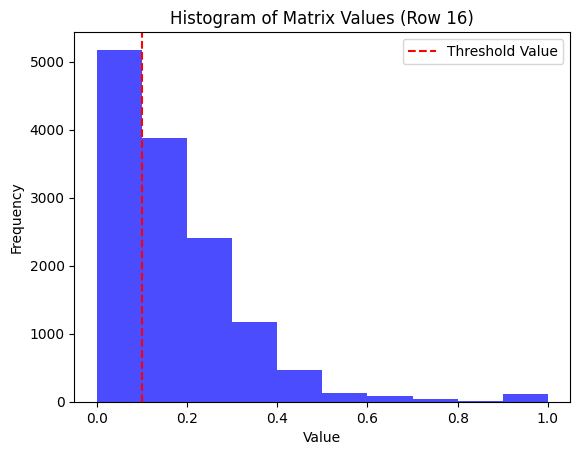

Threshold value for row 17 : 0.10005672380857857


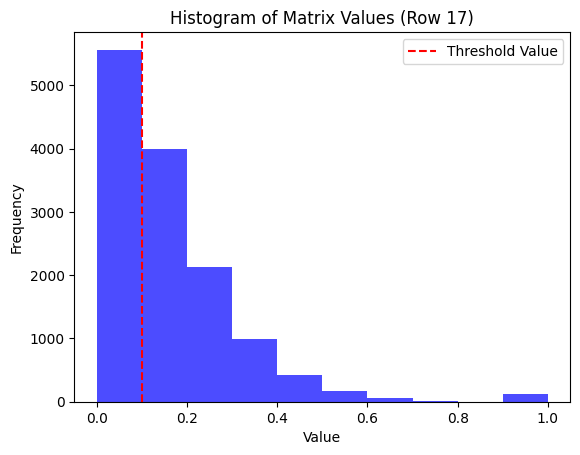

Threshold value for row 18 : 0.10000255816127562


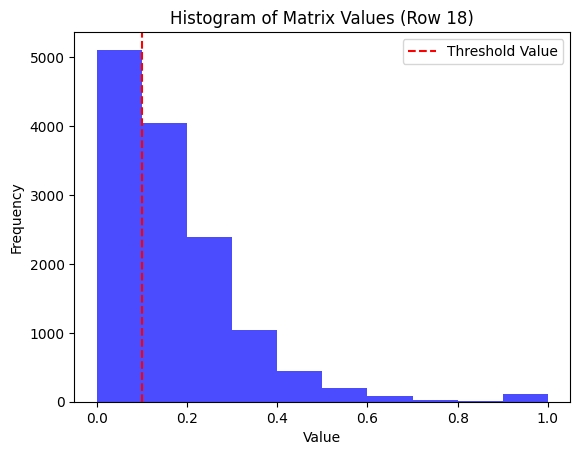

Threshold value for row 19 : 0.10006121210400408


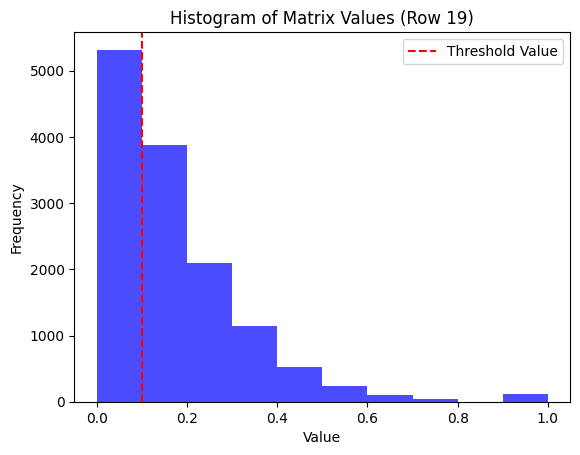

Threshold value for row 20 : 0.10000689154222553


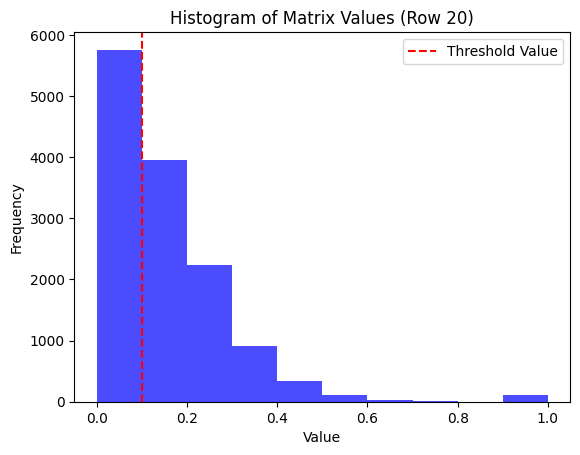

Threshold value for row 21 : 0.10002515018195447


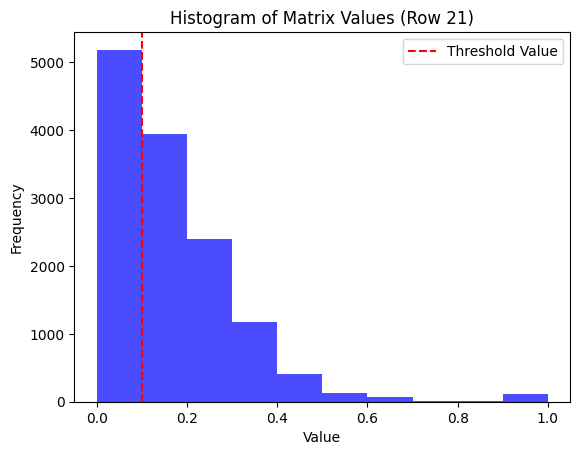

Threshold value for row 22 : 0.10008389844120022


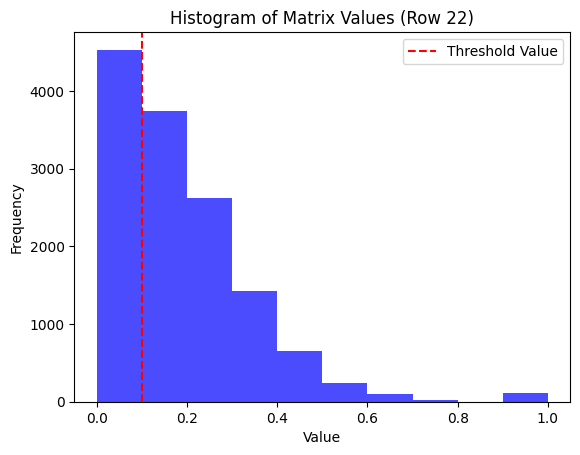

Threshold value for row 23 : 0.10000580940608038


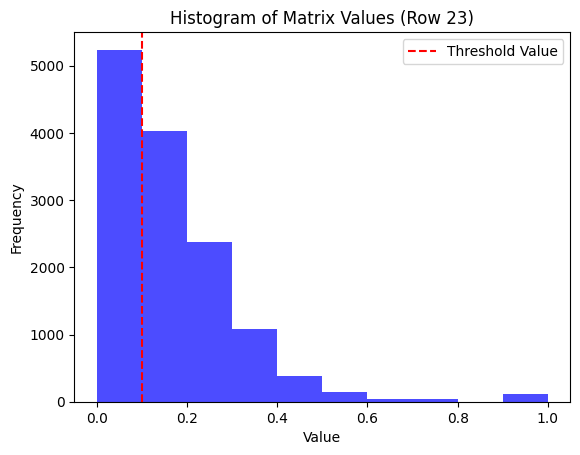

Threshold value for row 24 : 0.10001290758506219


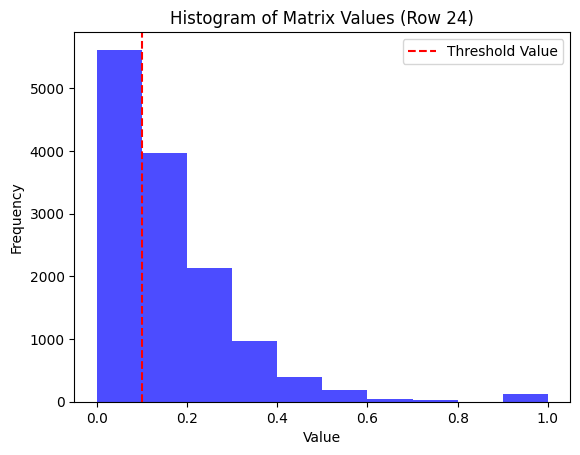

Threshold value for row 25 : 0.10005808040444383


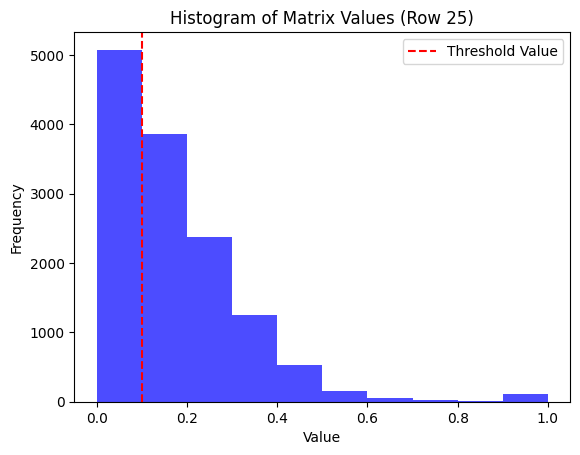

Threshold value for row 26 : 0.10014495239433077


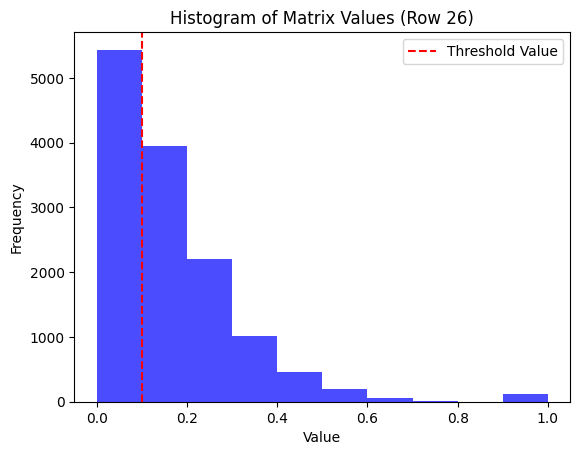

Threshold value for row 27 : 0.10001122336408061


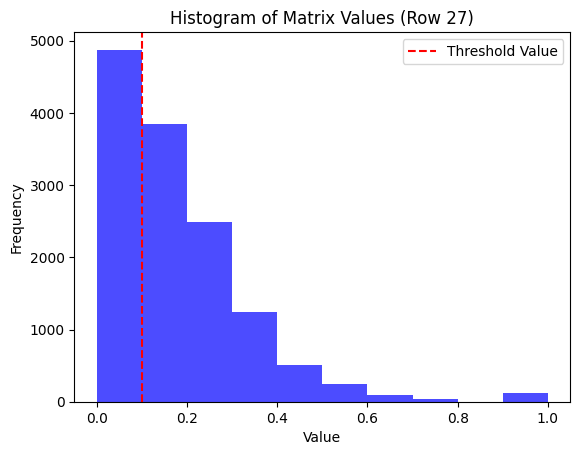

Threshold value for row 28 : 0.10002720021135364


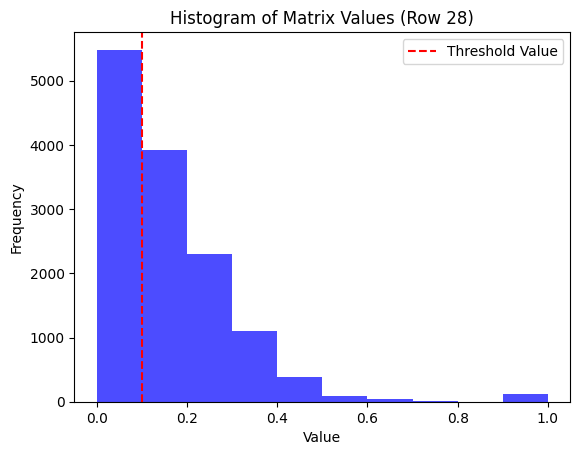

Threshold value for row 29 : 0.1000169900288522


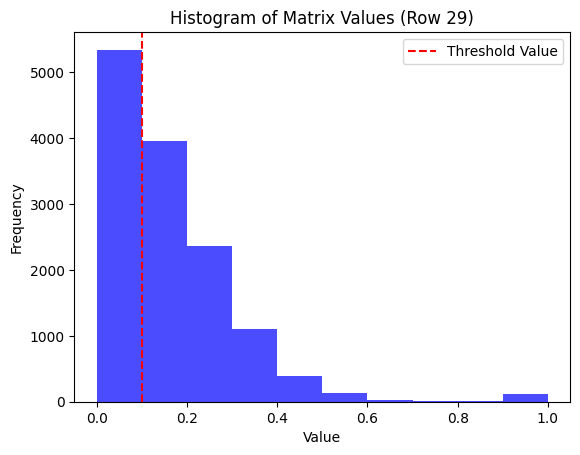

Threshold value for row 30 : 0.10000907164495042


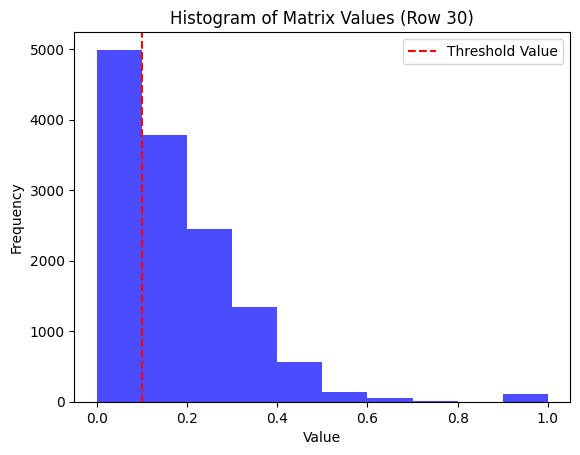

Threshold value for row 31 : 0.10001754303168268


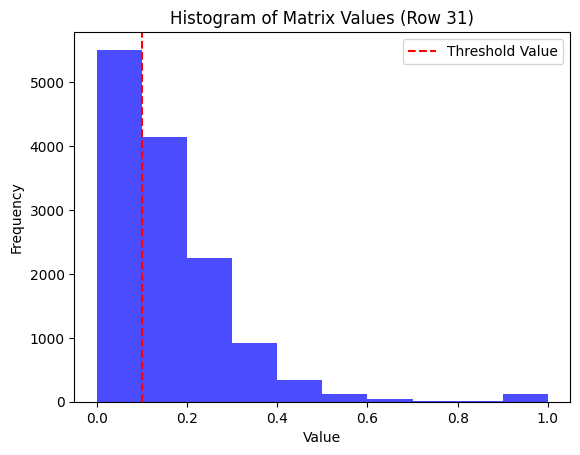

Threshold value for row 32 : 0.10003323203969557


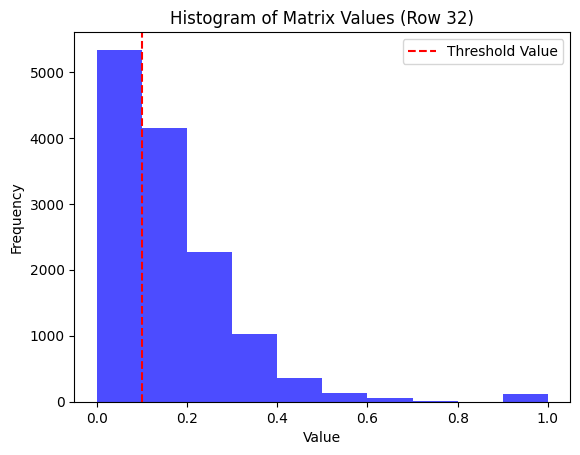

Threshold value for row 33 : 0.1000143933206321


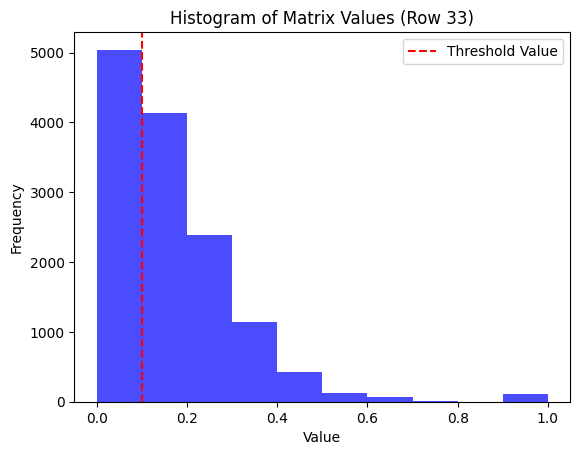

Threshold value for row 34 : 0.10002185687099034


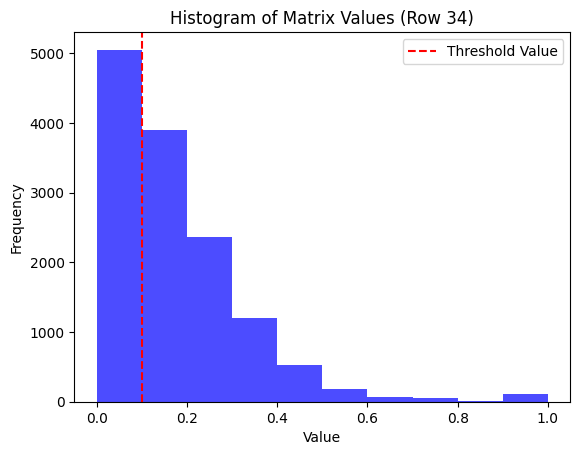

Threshold value for row 35 : 0.1000874624930918


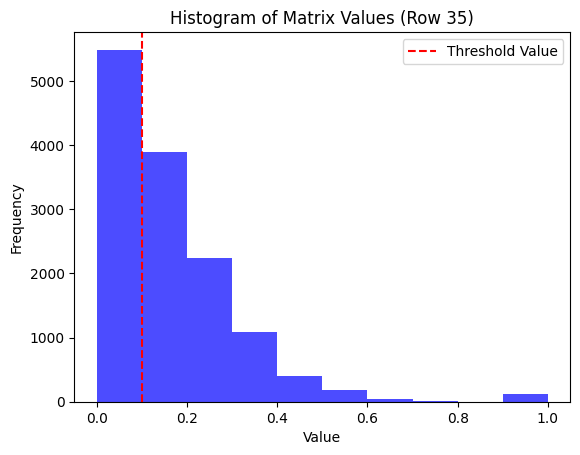

Threshold value for row 36 : 0.10002497469768708


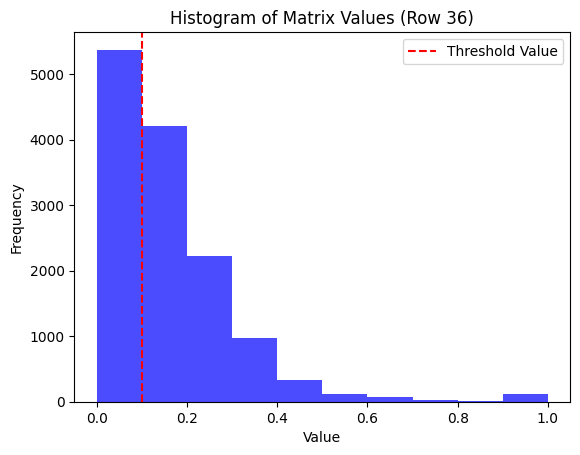

Threshold value for row 37 : 0.10000133023956824


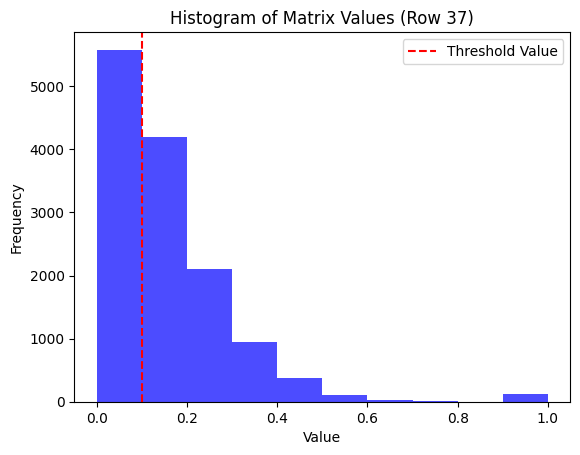

Threshold value for row 38 : 0.10000071616020477


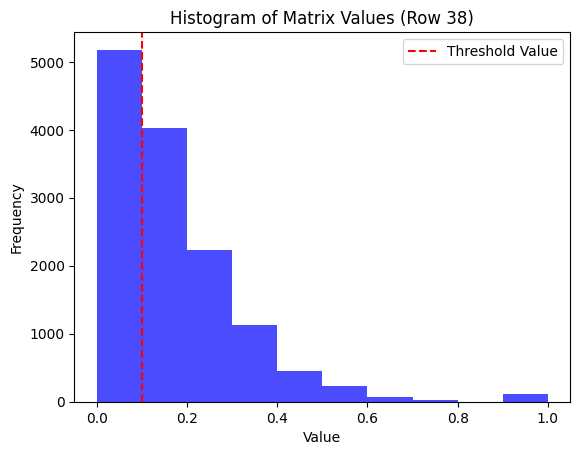

Threshold value for row 39 : 0.10004397100932615


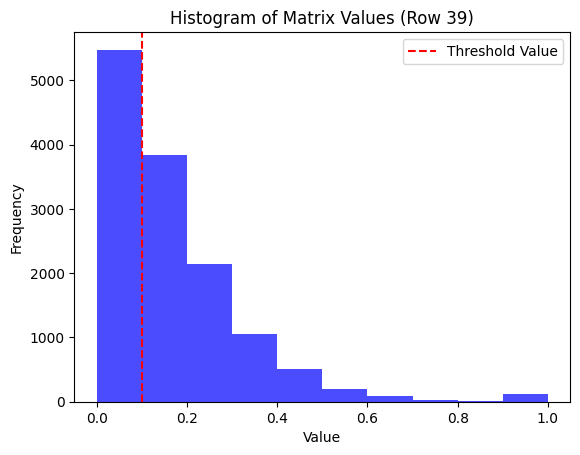

Threshold value for row 40 : 0.10000431854263389


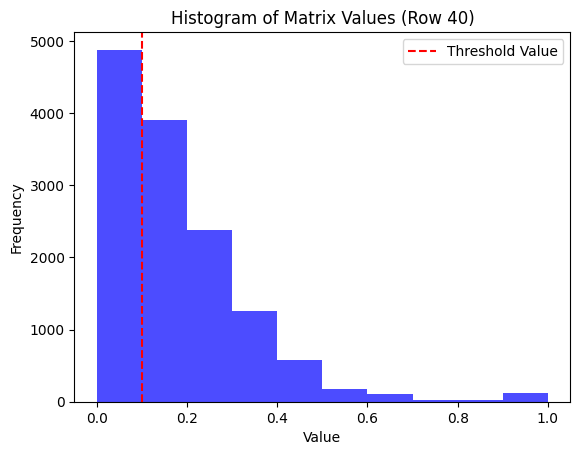

Threshold value for row 41 : 0.10002894884992002


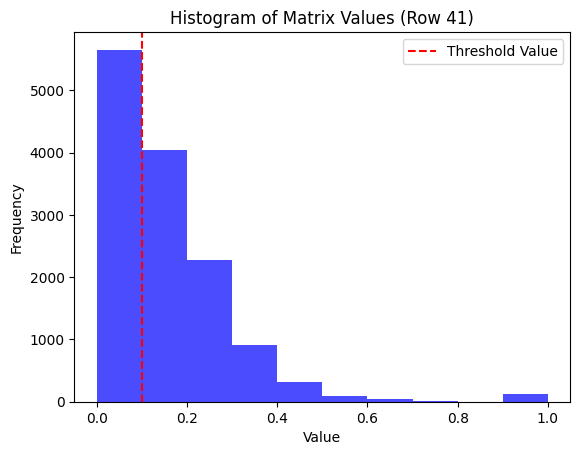

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Iterate over each row in the DataFrame
for index, row in result_df.iterrows():
    # Extract the matrix from the attribute of the current row
    matrix = row['psi_matrix']

    # Flatten the matrix into a 1D array
    flat_matrix = matrix.flatten()

    # Create a histogram of the values in the array
    hist, bins = np.histogram(flat_matrix, bins=10)  # Adjust the number of bins as needed

    # Find the bin with the highest count
    max_count_index = np.argmax(hist)

    # Determine the corresponding value (bin edge) as the threshold
    threshold_value = bins[max_count_index + 1]

    print("Threshold value for row", index, ":", threshold_value)

    # Plot the histogram with bins
    plt.hist(flat_matrix, bins=10, color='blue', alpha=0.7)
    plt.axvline(x=threshold_value, color='red', linestyle='--', label='Threshold Value')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Matrix Values (Row ' + str(index) + ')')
    plt.legend()
    plt.show()


In [ ]:
# Iterate over each row in the DataFrame
for index, row in result_df.iterrows():
    # Extract the matrix from the attribute of the current row
    matrix = row['psi_matrix']

    # Flatten the matrix into a 1D array
    flat_matrix = matrix.flatten()

    # Create a histogram of the values in the array
    hist, bins = np.histogram(flat_matrix, bins=5)  # Adjust the number of bins as needed

    # Find the bin with the highest count
    max_count_index = np.argmax(hist)

    # Determine the corresponding value (bin edge) as the threshold
    threshold_value = bins[max_count_index + 1]

    print("Threshold value for row", index, ":", threshold_value)

Threshold value for row 12 : 0.2000364350445733
Threshold value for row 13 : 0.20005982102686465
Threshold value for row 14 : 0.2000932659233251
Threshold value for row 15 : 0.20001191695777984
Threshold value for row 16 : 0.20004202277961705
Threshold value for row 17 : 0.20005042116318095
Threshold value for row 18 : 0.20000227392113387
Threshold value for row 19 : 0.20005441075911473
Threshold value for row 20 : 0.20000612581531158
Threshold value for row 21 : 0.20002235571729285
Threshold value for row 22 : 0.20007457639217796
Threshold value for row 23 : 0.2000051639165159
Threshold value for row 24 : 0.20001147340894418
Threshold value for row 25 : 0.2000516270261723
Threshold value for row 26 : 0.20012884657273847
Threshold value for row 27 : 0.20000997632362721
Threshold value for row 28 : 0.20002417796564767
Threshold value for row 29 : 0.20001510224786861
Threshold value for row 30 : 0.20000806368440038
Threshold value for row 31 : 0.20001559380594014
Threshold value for row 

Binarisation of PSI matrices

In [ ]:
import pandas as pd
import numpy as np

# Create a copy of the DataFrame
final_df = result_df.copy()

# Iterate over each row in the DataFrame
for index, row in final_df.iterrows():
    # Extract the matrix from the attribute of the current row
    matrix = row['psi_matrix']

    # Apply thresholding to the matrix
    matrix_thresholded = np.where(matrix <= 0.35, 1, 0)

    # Update the matrix attribute in the copied DataFrame
    final_df.at[index, 'psi_matrix'] = matrix_thresholded

# Display the modified DataFrame
print("Thresholded DataFrame:")
print(final_df)

Thresholded DataFrame:
                                           psi_matrix  label
12  [[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
13  [[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,...      1
14  [[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
15  [[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,...      1
16  [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
17  [[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
18  [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,...      1
19  [[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,...      1
20  [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
21  [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
22  [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,...      1
23  [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
24  [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
25  [[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,...      1
26  [[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,...      1
2

In [ ]:
final_df.shape

(30, 2)

In [ ]:
# Get the matrix from the first row (row index 0)
matrix_row_1 = final_df.loc[12, 'psi_matrix']

# Get the shape (dimensions) of the matrix
matrix_shape_row_1 = matrix_row_1.shape

print(f"The shape of the matrix in row 1 is: {matrix_shape_row_1}")

The shape of the matrix in row 1 is: (116, 116)


In [ ]:
print(matrix_row_1)

[[0 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]]


Extracting topological features

In [ ]:
pip install networkx

In [ ]:
import networkx as nx
import pandas as pd

# Assuming final_df is your DataFrame containing thresholded matrices and labels

# Step 1: Extract the thresholded adjacency matrix for the 3rd row
adjacency_matrix = final_df.iloc[8]['psi_matrix']

# Step 2: Convert the adjacency matrix to a NetworkX graph
G = nx.from_numpy_array(adjacency_matrix)

# Step 3: Calculate the topological features
clustering_coefficient = nx.average_clustering(G)
average_node_degree = sum(dict(G.degree()).values()) / len(G)
global_efficiency = nx.global_efficiency(G)
characteristic_path_length = nx.average_shortest_path_length(G)

# Step 4: Create a new DataFrame with the calculated features and the label
topological_features_df = pd.DataFrame({
    'clustering_coefficient': [clustering_coefficient],
    'average_node_degree': [average_node_degree],
    'global_efficiency': [global_efficiency],
    'characteristic_path_length': [characteristic_path_length],
    'label': [final_df.iloc[8]['label']]
})

# Print the DataFrame with calculated features
print(topological_features_df)

   clustering_coefficient  average_node_degree  global_efficiency  \
0                0.937681           107.603448           0.967841   

   characteristic_path_length  label  
0                    1.064318      1  


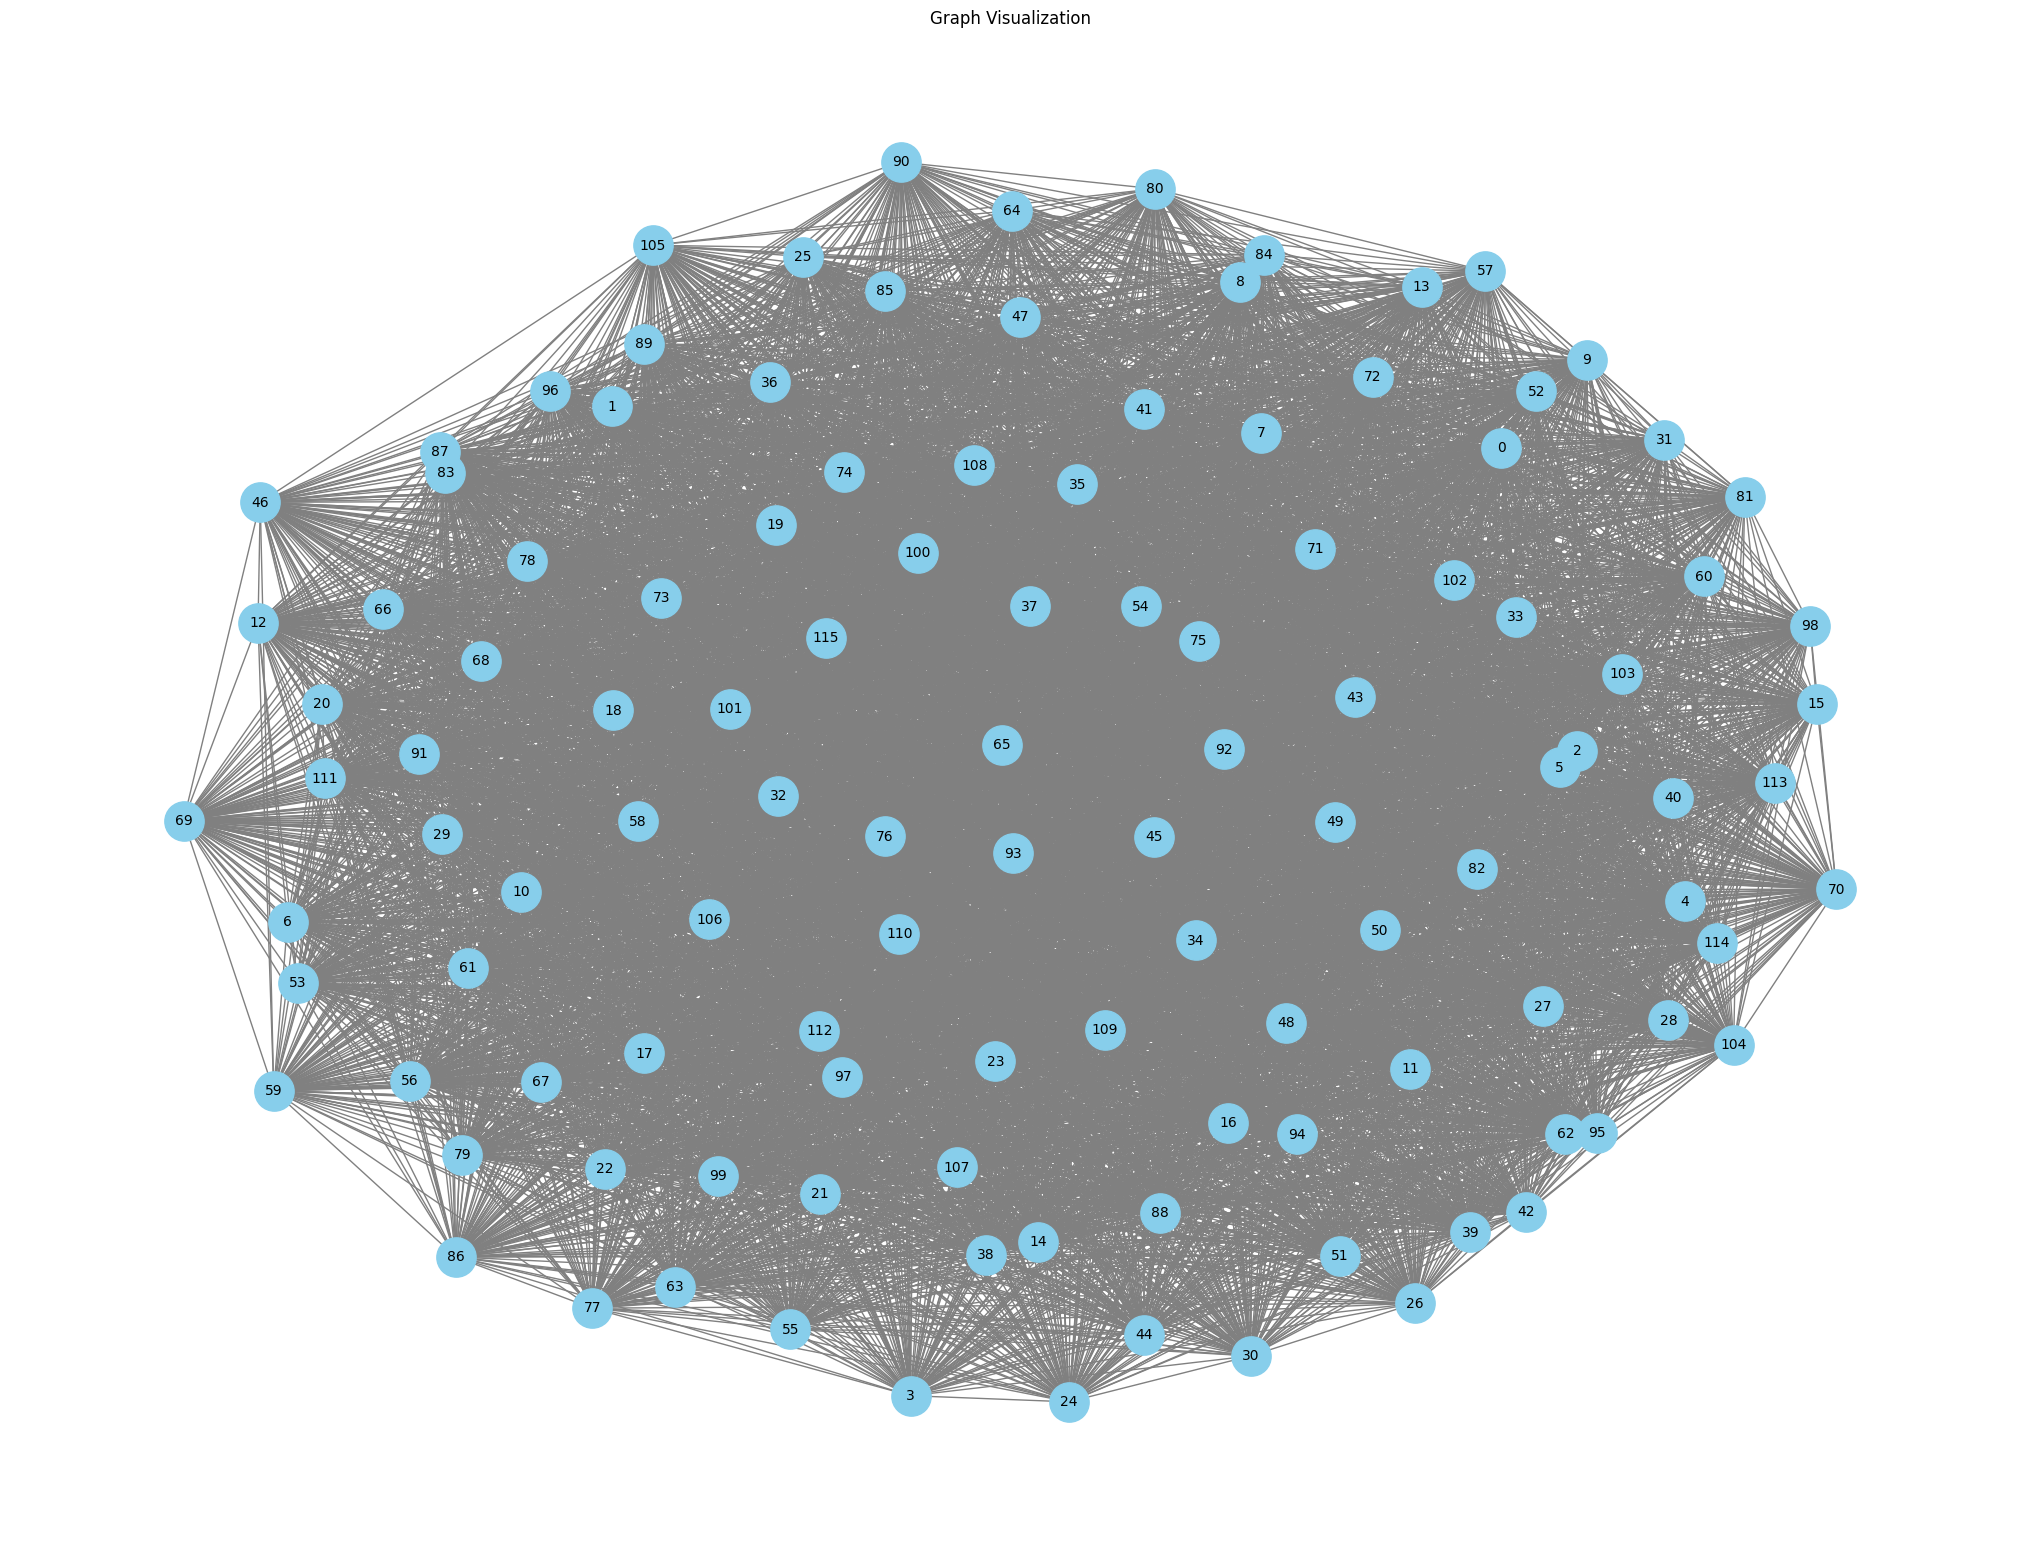

In [ ]:
import matplotlib.pyplot as plt
# Plot the graph
plt.figure(figsize=(20, 15))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=800, edge_color='gray', linewidths=1, font_size=10)
plt.title('Graph Visualization')
plt.show()

In [ ]:
# Dropping 4th row as character path length not calculated -- graph not connected -- error

# Drop the 4th row and the last row from final_df
final_df = final_df.drop([16, len(final_df) - 1])

# Print the updated final_df
print(final_df)

                                           psi_matrix  label
12  [[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
13  [[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,...      1
14  [[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
15  [[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,...      1
17  [[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
18  [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,...      1
19  [[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,...      1
20  [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
21  [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
22  [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,...      1
23  [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
24  [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      1
25  [[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,...      1
26  [[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,...      1
27  [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...      0
28  [[0, 0, 1, 1, 1, 1, 

In [ ]:
final_df.shape

(28, 2)

In [ ]:
import pandas as pd

In [ ]:
# Initialize lists to store the calculated features and labels
clustering_coefficients = []
average_node_degrees = []
global_efficiencies = []
characteristic_path_lengths = []
labels = []

# Iterate over each row in final_df
for index, row in final_df.iterrows():
    # Step 1: Extract the thresholded adjacency matrix
    adjacency_matrix = row['psi_matrix']

    # Step 2: Convert the adjacency matrix to a NetworkX graph
    G = nx.from_numpy_array(adjacency_matrix)

    # Step 3: Calculate the topological features
    clustering_coefficient = nx.average_clustering(G)
    average_node_degree = sum(dict(G.degree()).values()) / len(G)
    global_efficiency = nx.global_efficiency(G)
    characteristic_path_length = nx.average_shortest_path_length(G)

    # Step 4: Append the calculated features and label to the lists
    clustering_coefficients.append(clustering_coefficient)
    average_node_degrees.append(average_node_degree)
    global_efficiencies.append(global_efficiency)
    characteristic_path_lengths.append(characteristic_path_length)
    labels.append(row['label'])

# Create a new DataFrame with the calculated features and labels
topological_features_df = pd.DataFrame({
    'clustering_coefficient': clustering_coefficients,
    'average_node_degree': average_node_degrees,
    'global_efficiency': global_efficiencies,
    'characteristic_path_length': characteristic_path_lengths,
    'label': labels
})

# Print the DataFrame with calculated features
print(topological_features_df)

    clustering_coefficient  average_node_degree  global_efficiency  \
0                 0.931933           107.068966           0.965517   
1                 0.906611           104.017241           0.952249   
2                 0.930573           106.879310           0.964693   
3                 0.938440           107.655172           0.968066   
4                 0.924952           105.879310           0.960345   
5                 0.918476           104.879310           0.955997   
6                 0.902055           102.879310           0.947301   
7                 0.937681           107.603448           0.967841   
8                 0.921733           105.758621           0.959820   
9                 0.884083           101.241379           0.940180   
10                0.925493           106.172414           0.961619   
11                0.923534           106.051724           0.961094   
12                0.910339           104.120690           0.952699   
13                0.

In [ ]:
topological_features_df.shape

(28, 5)

Dataset input to ML models

In [ ]:
# Drop the 'label' column to get the feature matrix X
X = topological_features_df.drop(columns=['label'])

print(X)

    clustering_coefficient  average_node_degree  global_efficiency  \
0                 0.931933           107.068966           0.965517   
1                 0.906611           104.017241           0.952249   
2                 0.930573           106.879310           0.964693   
3                 0.938440           107.655172           0.968066   
4                 0.924952           105.879310           0.960345   
5                 0.918476           104.879310           0.955997   
6                 0.902055           102.879310           0.947301   
7                 0.937681           107.603448           0.967841   
8                 0.921733           105.758621           0.959820   
9                 0.884083           101.241379           0.940180   
10                0.925493           106.172414           0.961619   
11                0.923534           106.051724           0.961094   
12                0.910339           104.120690           0.952699   
13                0.

In [ ]:
# Extract target vector y (label)
y = topological_features_df['label']

print(y)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
Name: label, dtype: int64


Machine Learning Model

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(22, 4)

In [ ]:
y_val.shape

(6,)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.svm import SVC

In [ ]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)

In [ ]:
# Evaluation metrics for SVM
print("\nSVM Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_svm))
print("Precision:", precision_score(y_val, y_pred_svm))
print("Recall:", recall_score(y_val, y_pred_svm))
print("F1-score:", f1_score(y_val, y_pred_svm))


SVM Metrics:
Accuracy: 0.3333333333333333
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

In [ ]:
# Evaluation metrics for Random Forest
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Precision:", precision_score(y_val, y_pred_rf, average='macro'))
print("Recall:", recall_score(y_val, y_pred_rf, average='macro'))
print("F1-score:", f1_score(y_val, y_pred_rf, average='macro'))

Random Forest Metrics:
Accuracy: 0.3333333333333333
Precision: 0.375
Recall: 0.375
F1-score: 0.3333333333333333


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
# SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_val_scaled)

In [ ]:
# Evaluation metrics for SVM
print("\nSVM Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_svm))
print("Precision:", precision_score(y_val, y_pred_svm))
print("Recall:", recall_score(y_val, y_pred_svm))
print("F1-score:", f1_score(y_val, y_pred_svm))


SVM Metrics:
Accuracy: 0.3333333333333333
Precision: 0.5
Recall: 0.25
F1-score: 0.3333333333333333


In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_val_scaled)

In [ ]:
# Evaluation metrics for Random Forest
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Precision:", precision_score(y_val, y_pred_rf, average='macro'))
print("Recall:", recall_score(y_val, y_pred_rf, average='macro'))
print("F1-score:", f1_score(y_val, y_pred_rf, average='macro'))

Random Forest Metrics:
Accuracy: 0.3333333333333333
Precision: 0.375
Recall: 0.375
F1-score: 0.3333333333333333
